# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [5]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                   -0.002108
TARGET                        1.000000
NAME_CONTRACT_TYPE           -0.030896
FLAG_OWN_CAR                 -0.021851
FLAG_OWN_REALTY              -0.006148
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
DAYS_EMPLOYED_ANOM           -0.045987
Name: TARGET, Length: 110, dtype: float64

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [7]:
app_train.corr()['TARGET'].sort_values().head(15)

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
Name: TARGET, dtype: float64

In [8]:
app_train.corr()['TARGET'].sort_values().tail(15)

DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
TARGET                         1.000000
Name: TARGET, dtype: float64

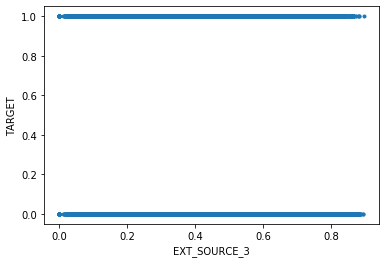

In [10]:
plt.plot(app_train['EXT_SOURCE_3'], app_train['TARGET'], '.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET')
plt.show()

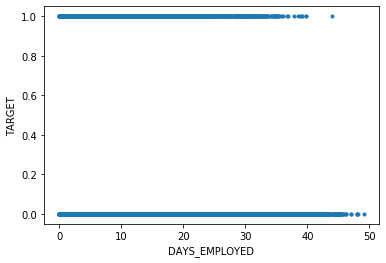

In [12]:
plt.plot(app_train['DAYS_EMPLOYED'] / (-365), app_train['TARGET'], '.')
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('TARGET')
plt.show()

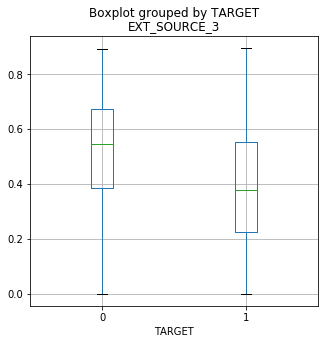

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
app_train.boxplot(column=['EXT_SOURCE_3'], by='TARGET', ax=ax)

In [17]:
app_train[app_train.corr()['TARGET'].sort_values().head(15).index].describe()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,ELEVATORS_AVG,ELEVATORS_MEDI,FLOORSMIN_AVG,FLOORSMIN_MEDI,LIVINGAREA_AVG
count,246546.000000,3.068510e+05,134133.000000,307511.000000,154491.000000,154491.000000,154491.000000,3.072330e+05,307511.000000,143620.000000,143620.000000,98869.000000,98869.000000,153161.000000
mean,0.510853,5.143927e-01,0.502130,16036.995067,0.226282,0.225897,0.222315,5.383962e+05,0.020868,0.078942,0.078078,0.231894,0.231625,0.107399
std,0.194844,1.910602e-01,0.211062,4363.988632,0.144641,0.145067,0.143709,3.694465e+05,0.013831,0.134576,0.134467,0.161380,0.161934,0.110565
min,0.000527,8.173617e-08,0.014568,7489.000000,0.000000,0.000000,0.000000,4.050000e+04,0.000290,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370650,3.924574e-01,0.334007,12413.000000,0.166700,0.166700,0.166700,2.385000e+05,0.010006,0.000000,0.000000,0.083300,0.083300,0.045300
50%,0.535276,5.659614e-01,0.505998,15750.000000,0.166700,0.166700,0.166700,4.500000e+05,0.018850,0.000000,0.000000,0.208300,0.208300,0.074500
75%,0.669057,6.636171e-01,0.675053,19682.000000,0.333300,0.333300,0.333300,6.795000e+05,0.028663,0.120000,0.120000,0.375000,0.375000,0.129900
max,0.896010,8.549997e-01,0.962693,25229.000000,1.000000,1.000000,1.000000,4.050000e+06,0.072508,1.000000,1.000000,1.000000,1.000000,1.000000


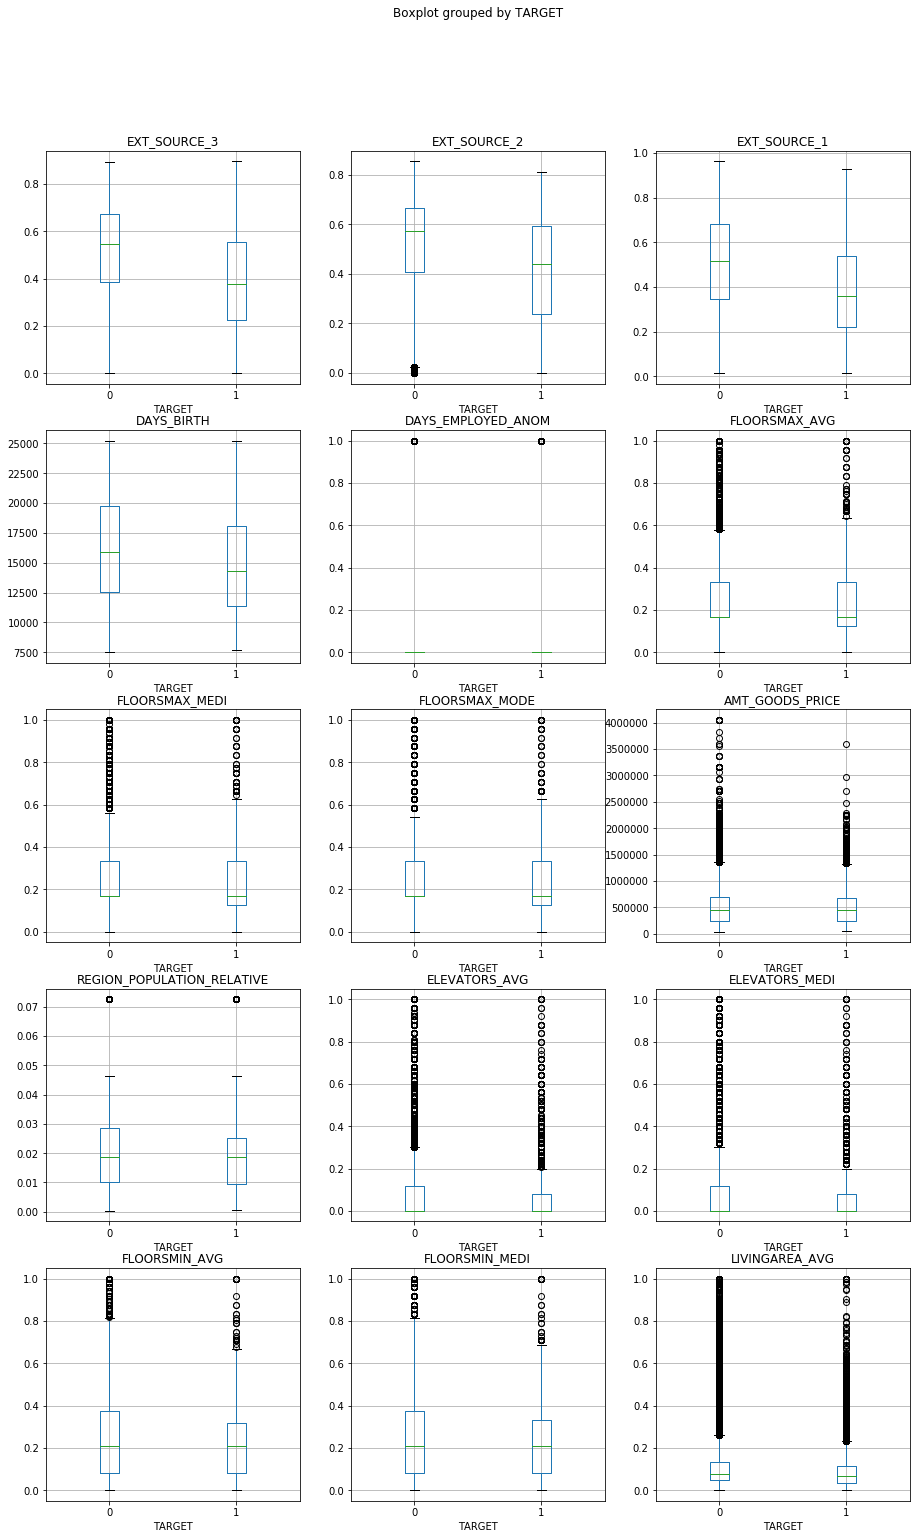

In [18]:
plt.figure(figsize=(15, 25))
for i in range(15):
    plt.subplot(5,3,1+i)
    app_train.boxplot(column=[app_train.corr()['TARGET'].sort_values().head(15).index[i]], by='TARGET', ax=plt.gca())#, showfliers=False)

In [15]:
app_train[app_train.corr()['TARGET'].sort_values().tail(15).index].describe()

,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY,OWN_CAR_AGE,DAYS_REGISTRATION,FLAG_DOCUMENT_3,REG_CITY_NOT_LIVE_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_EMPLOYED,TARGET
count,306490.000000,306490.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000,307511.000000,307511.000000,252137.000000,307511.000000
mean,0.100049,0.143421,0.179555,12.061091,-4986.120328,0.710023,0.078173,0.819889,0.230454,-2994.202373,-962.858788,2.052463,2.031521,-2384.169325,0.080729
std,0.362291,0.446698,0.383817,11.944812,3522.886321,0.453752,0.268444,0.384280,0.421124,1509.450419,826.808487,0.509034,0.502737,2338.360162,0.272419
min,0.000000,0.000000,0.000000,0.000000,-24672.000000,0.000000,0.000000,0.000000,0.000000,-7197.000000,-4292.000000,1.000000,1.000000,-17912.000000,0.000000
25%,0.000000,0.000000,0.000000,5.000000,-7479.500000,0.000000,0.000000,1.000000,0.000000,-4299.000000,-1570.000000,2.000000,2.000000,-3175.000000,0.000000
50%,0.000000,0.000000,0.000000,9.000000,-4504.000000,1.000000,0.000000,1.000000,0.000000,-3254.000000,-757.000000,2.000000,2.000000,-1648.000000,0.000000
75%,0.000000,0.000000,0.000000,15.000000,-2010.000000,1.000000,0.000000,1.000000,0.000000,-1720.000000,-274.000000,2.000000,2.000000,-767.000000,0.000000
max,24.000000,34.000000,1.000000,91.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,0.000000,1.000000


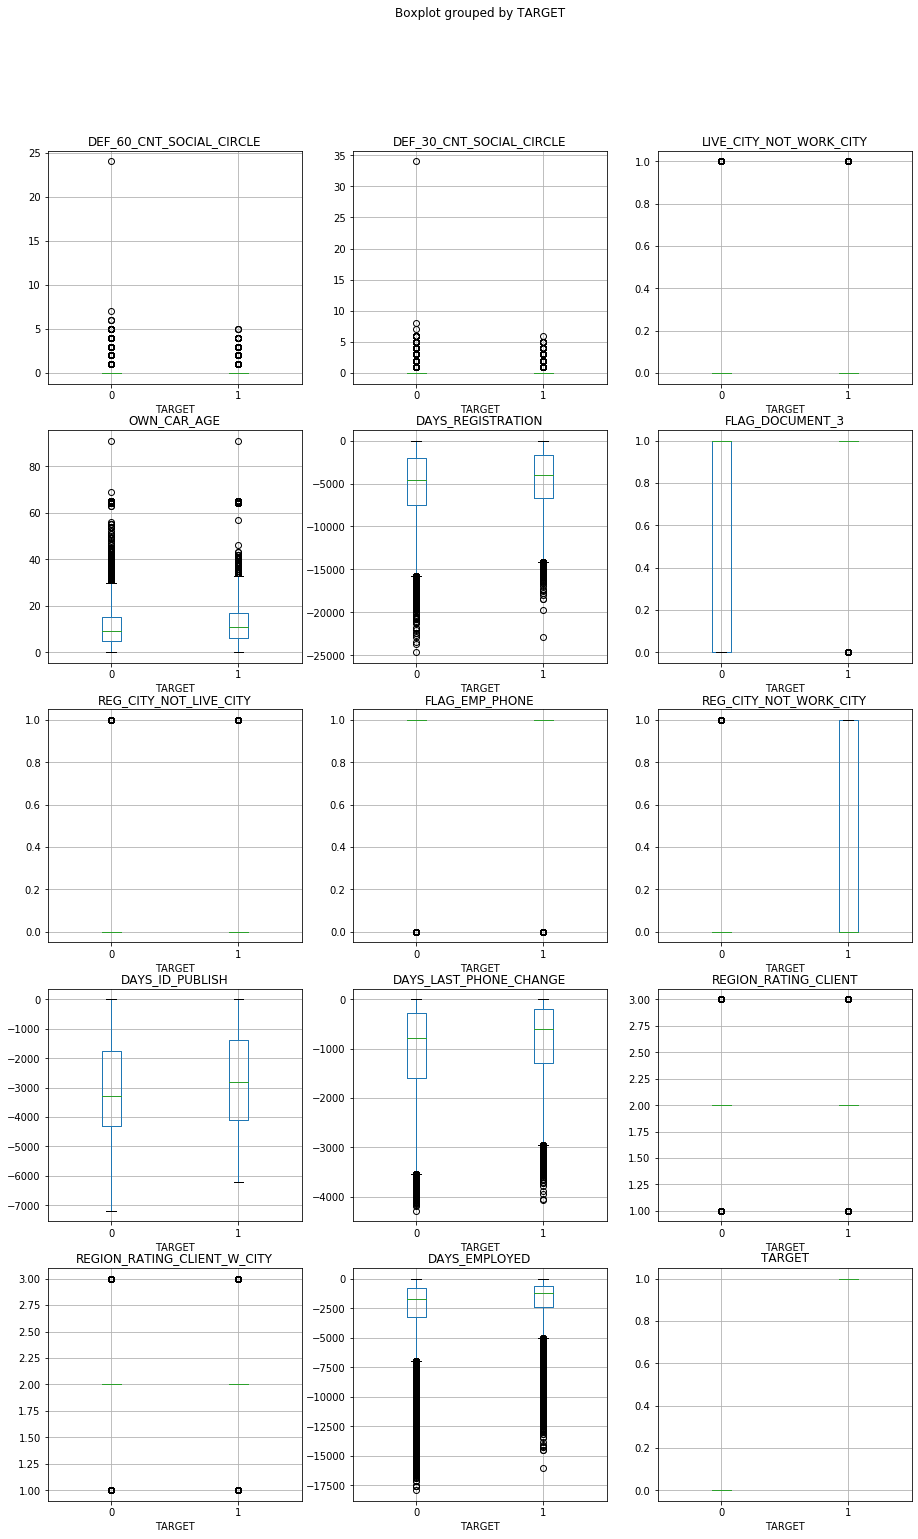

In [16]:
plt.figure(figsize=(15, 25))
for i in range(15):
    plt.subplot(5,3,1+i)
    app_train.boxplot(column=[app_train.corr()['TARGET'].sort_values().tail(15).index[i]], by='TARGET', ax=plt.gca())#, showfliers=False)